# IM (Ianniruberto, G.and Marrucci, G.) Differential Model, or DCR-CS Model
ref: Ianniruberto, G.; Marrucci, G. A simple constitutive equation for entangled polymers with chain stretch. *Journal of Rheology* __2001__, 45, 1305-1318.  
Define an effective time $\tau_{eff}$ to replace the disengagement time $\tau_d$ in DE model:  
The classical DE model of $\mathbf{S}(t)$ is replaced to be:  

$$\begin{align}
&\overset{\bigtriangledown }{\mathbf{S}^2} +2\mathbf{S}^2(\boldsymbol{\kappa}:\mathbf{S})+\frac{2}{\tau}\mathbf{S}\cdot\left(\mathbf{S}-\frac{1}{3}\mathbf{I}\right) = \mathbf{0}\\
&\tau = \frac{1}{2\left(\frac{1}{\tau_d}+\boldsymbol{\kappa}:\mathbf{S}\right)} + \tau_R\\
&\frac{d\lambda}{dt} = \lambda\boldsymbol{\kappa}:\mathbf{S} - \frac{\lambda F(\lambda)-1}{\tau_R} \\
&F(\lambda) = \left(\frac{\lambda_{max}^2-\frac{\lambda^2}{3}}{\lambda_{max}^2-\lambda^2}\right)\left(\frac{\lambda_{max}^2-1}{\lambda_{max}^2-\frac{1}{3}}\right) \\
&\boldsymbol{\sigma} = 3G_N^0 F(\lambda)\lambda^2\boldsymbol{S}
\end{align}$$  

Here:  
$$
\overset{\bigtriangledown }{\mathbf{S}^2} = \mathbf{S}\cdot \dot{\mathbf{S}} + \dot{\mathbf{S}}\cdot \mathbf{S} -\boldsymbol{\kappa}\cdot\mathbf{S}^2-\mathbf{S}^2\cdot\boldsymbol{\kappa}^T
$$

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab
import time
from IM_Model import IM_SingleMode_differential

In [3]:
#parameters for PS133k in ref: Costanzo, S. et al. Macromolecules 2016, 49, 3925-3935.
GN0 = 2.79E5
τc = 1.24E-3
τR = 0.124
λmax = 3.34
Gi = np.array([1.14E2, 2.52, 8.80E-1, 3.81E-1, 2.07E-1, 1.70E-1, 1.76E-1, 1.37E-1, 2.03E-1]) * GN0
τi_eq = np.array([2.16E-3, 5.90E-2, 3.33E-1, 1.53, 6.87, 2.9E1, 1.11E2, 3.63E2, 8.92E2]) * τc
τd_eq = np.sum(Gi*τi_eq**2)/np.sum(Gi*τi_eq)
shear_rate = 31.6 # 1/s
δt = 0.001 # seconds
finish_time = 100 # senconds

In [4]:
t0 = time.time()
t_span, τd_span, σ_span, λ_span, S_span = IM_SingleMode_differential(λmax=λmax,τR=τR,shear_rate=shear_rate,δt=δt,
                                                                    finish_time=finish_time,GN0=GN0,τd_eq=τd_eq)
print('Cost time: ', time.time() - t0, ' s')

Cost time:  16.101335287094116  s


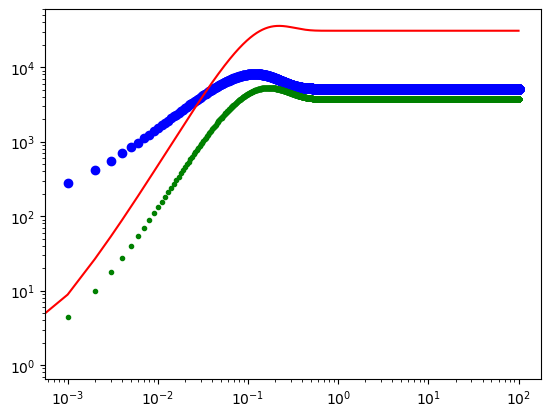

In [5]:
pylab.loglog(t_span-δt,σ_span[:,0,1]/shear_rate,'bo')
pylab.loglog(t_span-δt,(σ_span[:,0,0]-σ_span[:,1,1])/shear_rate,'r-')
pylab.loglog(t_span-δt,(σ_span[:,2,2]-σ_span[:,1,1])/shear_rate,'g.')

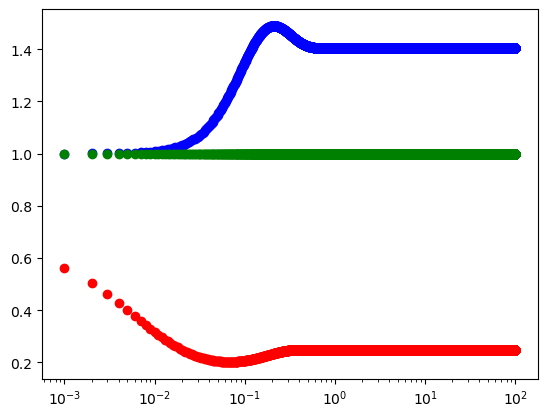

In [7]:
pylab.semilogx(t_span,τd_span,'ro')
pylab.semilogx(t_span,λ_span,'bo')
pylab.semilogx(t_span,np.trace(S_span,axis1=1,axis2=2),'go')